In [22]:
import matplotlib
# matplotlib.use('nbagg')
%matplotlib inline
import matplotlib.pyplot as plt

from pyha.components.cordic import ToPolar, CordicCore

%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.signal import hilbert, chirp
import logging
logging.basicConfig(level=logging.ERROR)
logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Signal generation

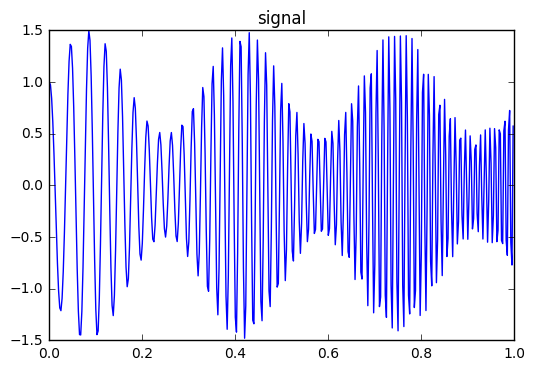

In [26]:
duration = 1.0
fs = 400.0
samples = int(fs * duration)
t = np.arange(samples) / fs

signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0 * np.pi * 3.0 * t))

analytic_signal = hilbert(signal)
plt.plot(t, signal)
plt.title('signal')
plt.show()

# NUMPY angle

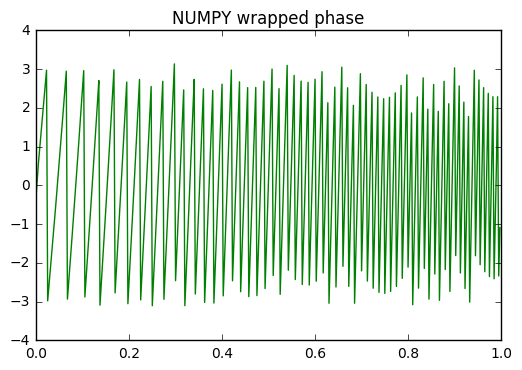

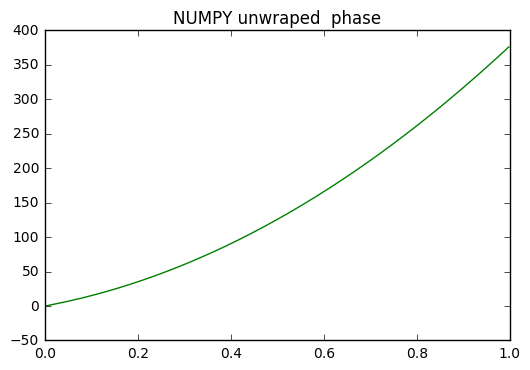

In [27]:
ref_instantaneous_phase = np.angle(analytic_signal)

plt.plot(t, ref_instantaneous_phase, color='g')
plt.title('NUMPY wrapped phase')
plt.show()

plt.plot(t, np.unwrap(ref_instantaneous_phase), color='g')
plt.title('NUMPY unwraped  phase')
plt.show()

# CORDIC angle

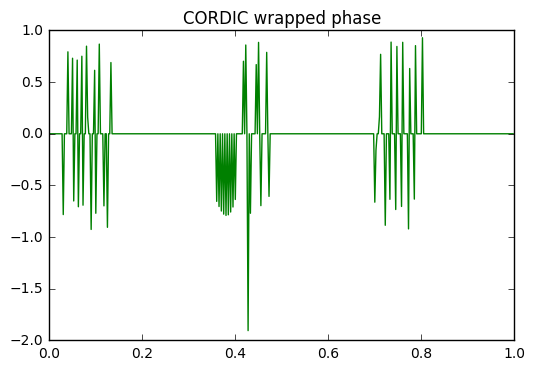

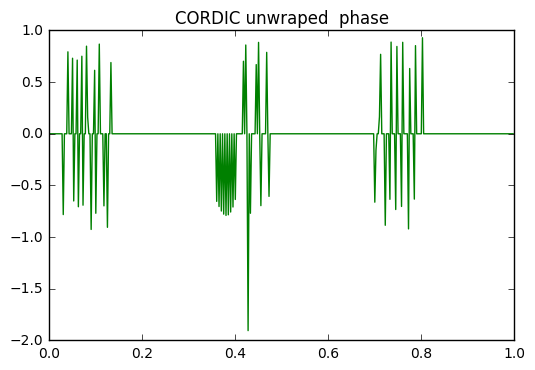

In [33]:
from pyha.common.sfix import ComplexSfix, Sfix
from pyha.simulation.simulation_interface import Simulation, SIM_HW_MODEL
# core = CordicCore(17)
# 
# 
# sim = Simulation(SIM_HW_MODEL, model=core, input_types=[ComplexSfix(left=0, right=-17), Sfix(left=2, right=-17)])
# ret = sim.main(analytic_signal, [0.]*len(analytic_signal))

core = ToPolar()
sim = Simulation(SIM_HW_MODEL, model=core, input_types=[ComplexSfix(left=0, right=-17)])
ret = sim.main(analytic_signal)

cord_instantaneous_phase = ret[1]
# cord_instantaneous_phase = cord.model_main(analytic_signal)

plt.plot(t, cord_instantaneous_phase, color='g')
plt.title('CORDIC wrapped phase')
plt.show()

plt.plot(t, np.unwrap(cord_instantaneous_phase), color='g')
plt.title('CORDIC unwraped  phase')
plt.show()

### Error

In [ ]:
wrap_error = cord_instantaneous_phase - ref_instantaneous_phase
plt.plot(t, wrap_error, color='g')
plt.title('Wrapped phase error NUMPY vs CORDIC')
plt.show()

unwrap_error = np.unwrap(cord_instantaneous_phase) - np.unwrap(ref_instantaneous_phase)
plt.plot(t, unwrap_error, color='g')
plt.title('Unwrapped error')
plt.show()

THIS IS FIXED NOW

WTF is this error on wrapped phase?? Unwrapping gets rid of the error...

2*pi error spikes....

It is because CORDIC does not hold the result in PI range


In [ ]:
n = 20
plt.plot(analytic_signal.real[:n], analytic_signal.imag[:n], 'o')
plt.show()

# for z, sig, wrap_err in zip(cord_instantaneous_phase, analytic_signal, wrap_error):
#     print('I: {}, Q: {}'. format(sig.real, sig.imag))
# #     if z < -np.pi:
#     if abs(wrap_err) > 0.01:
#         print('FUCK: ', wrap_err)
        
plt.plot(t, cord_instantaneous_phase, color='g')
plt.plot(t,analytic_signal.real)
plt.title('CORDIC wrapped phase')
plt.show()